## Homework 1: Applied Machine Learning

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/1")

Mounted at /content/drive


This assignment covers contents of the first three lectures.

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [4]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import r2_score, accuracy_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is data / AdultIncome.csv



In [4]:
# Load the dataset
adult_income_df = pd.read_csv("/content/drive/MyDrive/1/adult_income.csv")
adult_income_df



,age,workclass,education,marital status,occupation,relationship,race,gender,capital gain,capital loss,hours per week,income,income_value
0,90,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,0,4356,40,<=50K,47710
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K,40375
2,66,NaN,Some-college,Widowed,NaN,Unmarried,Black,Female,0,4356,40,<=50K,43369
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K,32399
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K,39642
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,<=50K,41979
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K,48434
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K,1247500
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K,38473


<b> 1.1 Handle the missing values of the data and Create a bar chart to compare the average income for Females and Males from Income Dataset. Are there differences in income ? </b>

In [5]:
### Code here
adult_income_df.head()


,age,workclass,education,marital status,occupation,relationship,race,gender,capital gain,capital loss,hours per week,income,income_value
0,90,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,0,4356,40,<=50K,47710
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K,40375
2,66,NaN,Some-college,Widowed,NaN,Unmarried,Black,Female,0,4356,40,<=50K,43369
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K,32399
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K,39642


In [6]:
data = adult_income_df
data.dropna(inplace=True)
data
#data.head()

,age,workclass,education,marital status,occupation,relationship,race,gender,capital gain,capital loss,hours per week,income,income_value
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K,40375
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K,32399
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K,39642
5,34,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,3770,45,<=50K,49615
6,38,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,<=50K,31855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,<=50K,41979
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K,48434
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K,1247500
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K,38473


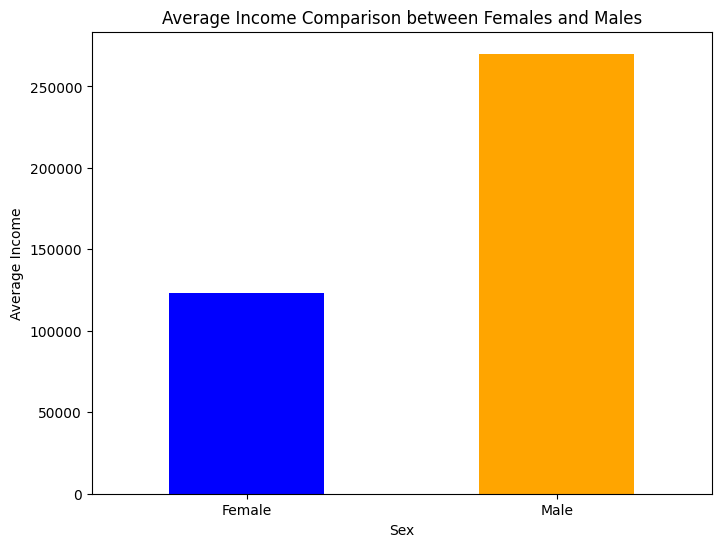

Males have higher average income than females.


In [7]:
# Calculate average income for females and males
avg_income = data.groupby('gender')['income_value'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
avg_income.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Income Comparison between Females and Males')
plt.xlabel('Sex')
plt.ylabel('Average Income')
plt.xticks(rotation=0)
plt.show()

# Checking if there are differences in income
income_difference = avg_income['Male'] - avg_income['Female']
if income_difference > 0:
    print("Males have higher average income than females.")
elif income_difference < 0:
    print("Females have higher average income than males.")
else:
    print("There is no difference in average income between females and males.")

**COMMENT HERE**

We dropped the entries where the value is NIL and then we calculated the mean value of the income for males and females. Upon plotting we find there is a difference income and average male income is more than average female income.

In [8]:
# We dropped the entries where the value is NIL and then we calculated the mean value of the income for males and females.
# Upon plotting we find there is a difference income and average male income is more than average female income.

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables Income Dataset. </b>
1. race
2. gender
3. maritial_status
4. working class
5. relation
<b></b>

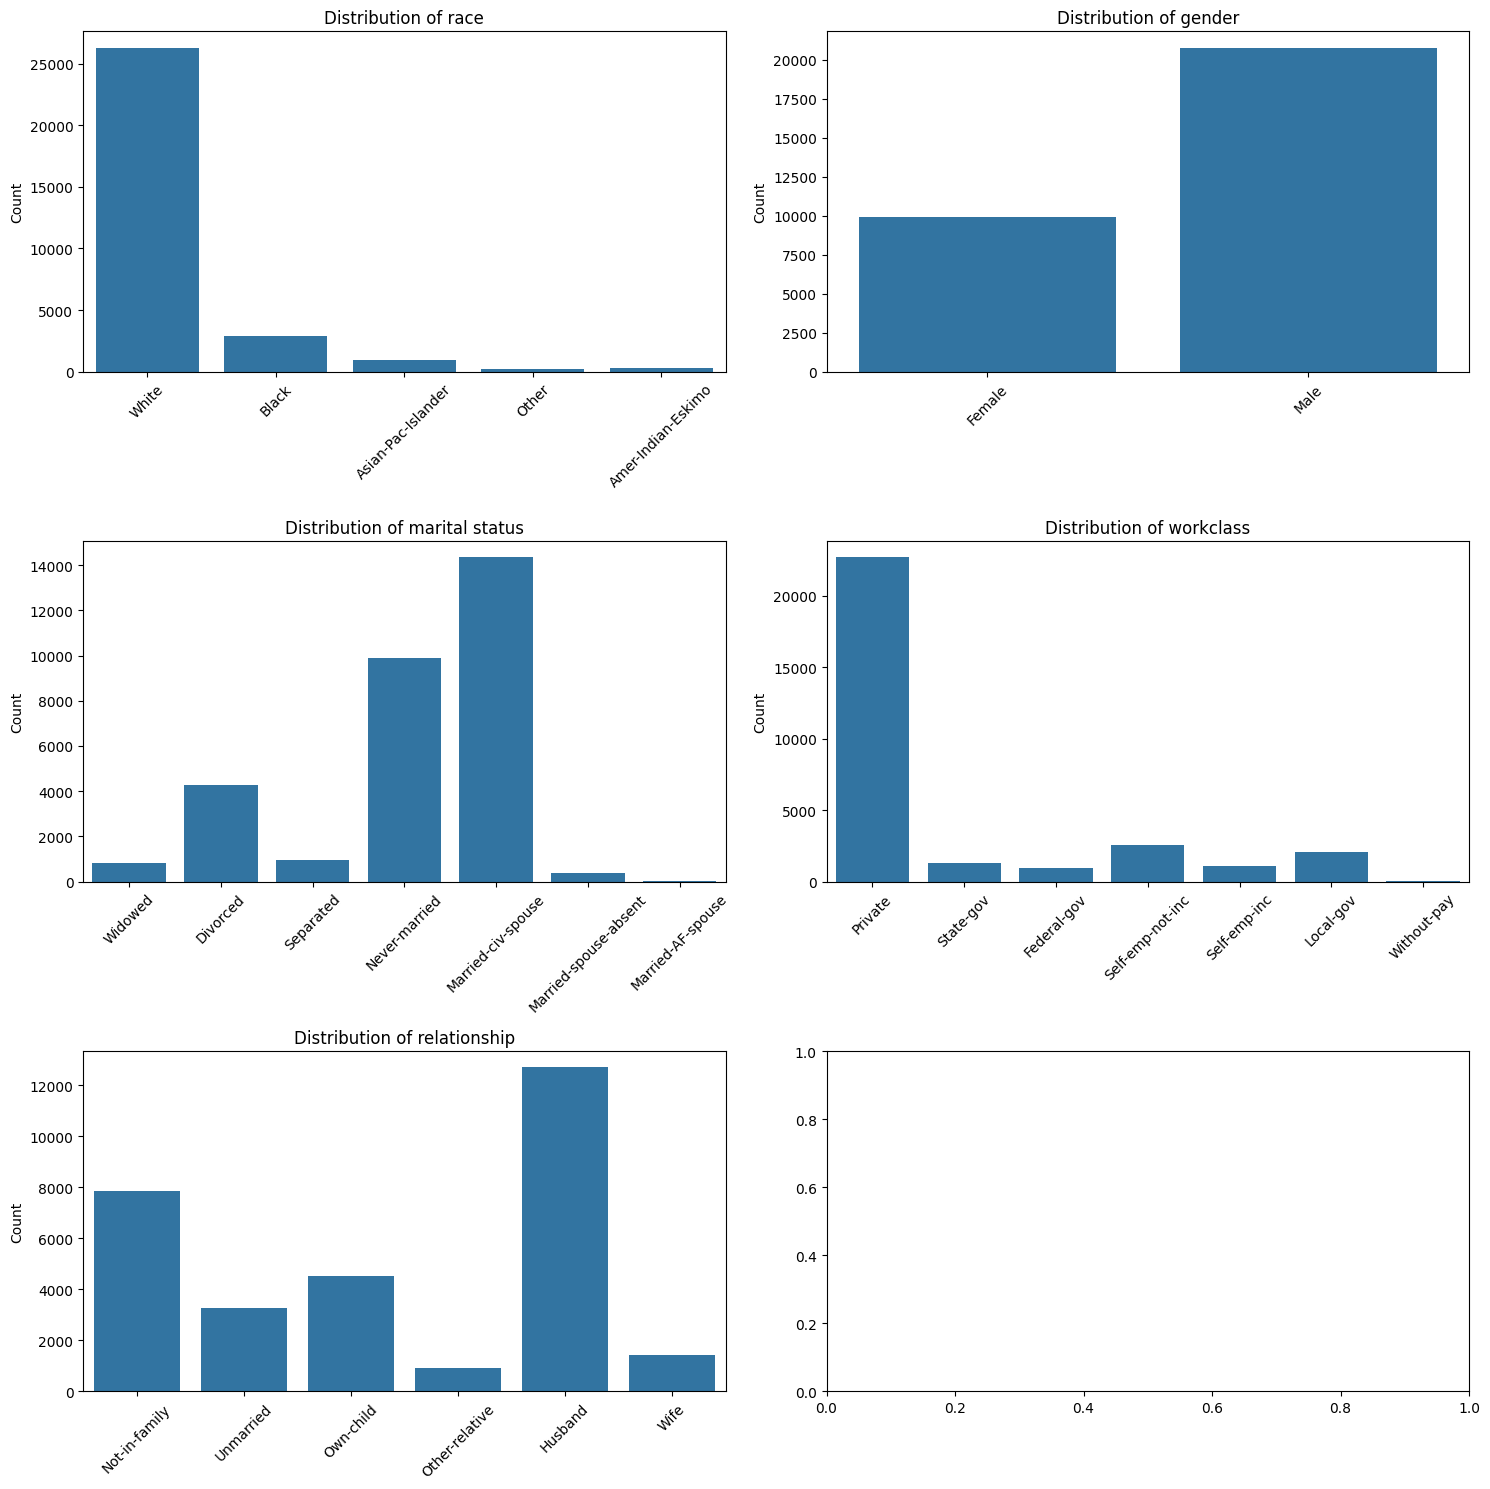

In [9]:
category = ['race', 'gender', 'marital status', 'workclass', 'relationship']
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, variable in enumerate(category):
    row = i // 2
    col = i % 2
    sns.countplot(x=variable, data=data, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {variable}')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<b> 1.3 Compare the income of based on Education Qualification in Income Data Set</b>





In [10]:
### Code here
income_median = data.groupby('education')['income_value'].median().sort_values()
income_mean = data.groupby('education')['income_value'].mean().sort_values()
# income = income.sort_values()
display(income_median,'\n')
display(income_mean)

education
Preschool        39128.5
1st-4th          39351.0
12th             40231.0
10th             40257.0
9th              40335.0
7th-8th          40546.0
11th             40638.5
5th-6th          41364.0
HS-grad          41720.0
Some-college     42590.0
Assoc-acdm       43573.0
Assoc-voc        43839.0
Bachelors        47296.0
Masters         203428.0
Doctorate       509154.5
Prof-school     598596.0
Name: income_value, dtype: float64

'\n'

education
Preschool        38704.391304
1st-4th          70010.698718
5th-6th          72042.874587
9th              79790.887689
11th             88148.429924
7th-8th          91692.450262
10th             96189.226233
12th            101429.974555
HS-grad         157977.590891
Some-college    185226.003690
Assoc-acdm      221132.912745
Assoc-voc       233339.690386
Bachelors       344291.819182
Masters         464266.980896
Doctorate       597935.195980
Prof-school     600250.152330
Name: income_value, dtype: float64

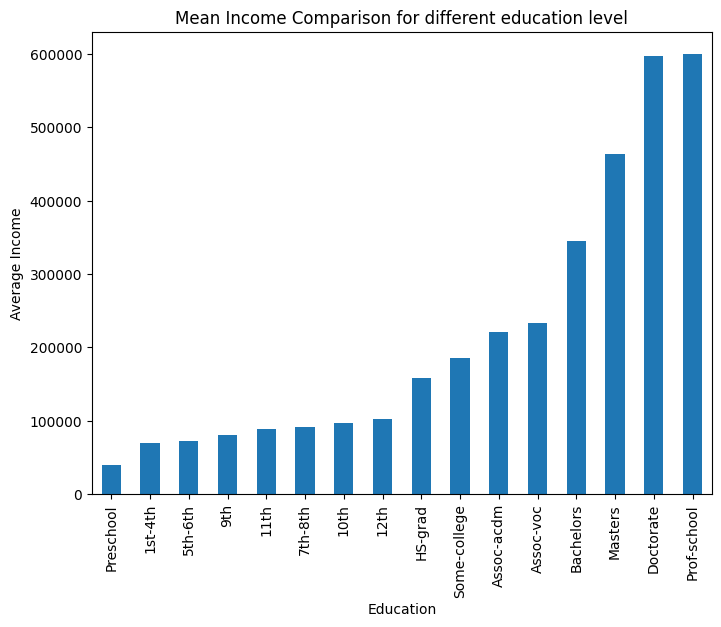

In [11]:
# Creating a bar chart of the sorted mean income data
plt.figure(figsize=(8, 6))
income_mean.plot(kind='bar')
plt.title('Mean Income Comparison for different education level')
plt.xlabel('Education')
plt.ylabel('Average Income')
plt.xticks(rotation=90)
plt.show()


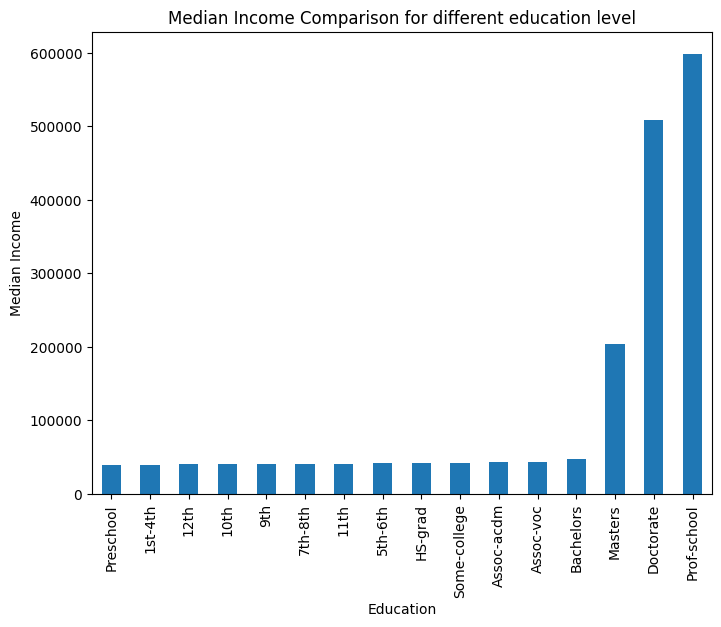

In [12]:
# Creating a bar chart of the sorted median income data
plt.figure(figsize=(8, 6))
income_median.plot(kind='bar')
plt.title('Median Income Comparison for different education level')
plt.xlabel('Education')
plt.ylabel('Median Income')
plt.xticks(rotation=90)
plt.show()

<b> 1.4 Plot relationships between the following features and the target variable Income_value as a small multiple of scatter plots, is there any relation between them ? Is it possible to perform Regression on it ? </b>

1. age
2. capital gain
3. capital loss
4. hours per week



<b></b>

In [13]:
data.head()

,age,workclass,education,marital status,occupation,relationship,race,gender,capital gain,capital loss,hours per week,income,income_value
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K,40375
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K,32399
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K,39642
5,34,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,3770,45,<=50K,49615
6,38,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,<=50K,31855


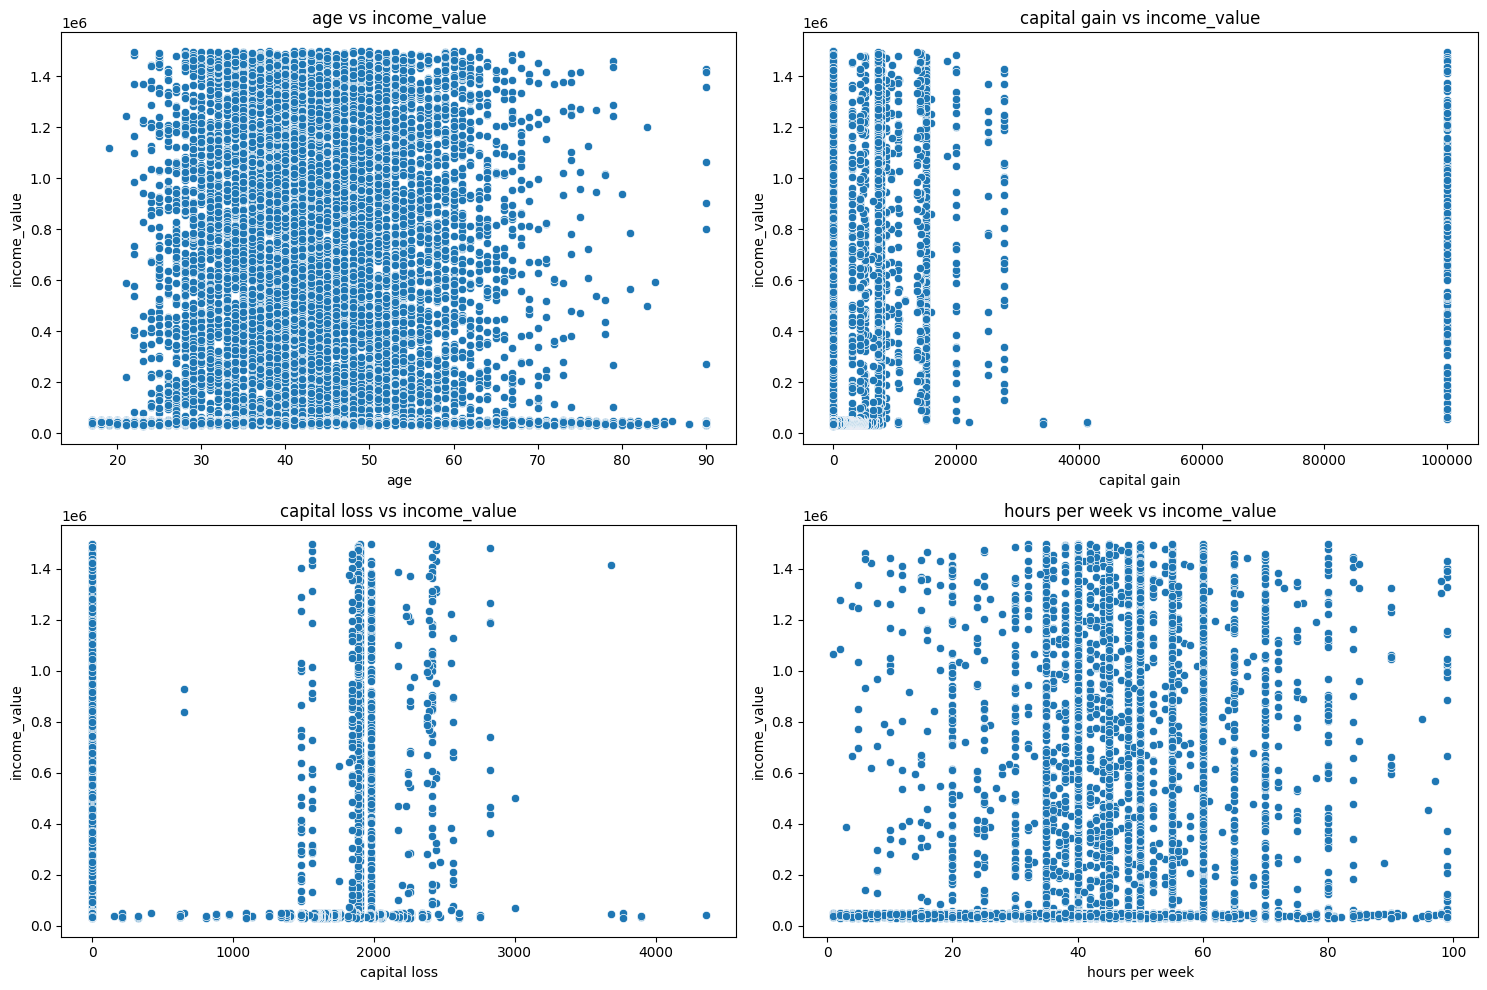

In [14]:
# relevant features and target variable
features = ['age', 'capital gain', 'capital loss', 'hours per week']
target_variable = 'income_value'

# small subplots of scatter plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=feature, y=target_variable, data=data)
    plt.title(f'{feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)

plt.tight_layout()
plt.show()

It is not possible to perform Regression on this data because Linear and Logistic regression will have a lot of variance & errors.

<b> 1.5  Load the Car Rental Data Set , handle missing values and Create a bar chart to compare the average car rental count on holiday and non-holiday weekdays. Are there differences in rental patterns? </b>


### The dataset to be used for this section is data / car_rental.csv

In [15]:
# Load the dataset
car_rental_df = pd.read_csv('/content/drive/MyDrive/1/car_rental.csv')
car_rental_df

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count_value
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,December,winter,No,Thursday,Yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,December,winter,No,Friday,Yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,December,winter,No,Saturday,No,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,December,winter,No,Sunday,No,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [16]:
### Code here
cardata = car_rental_df
cardata.dropna(inplace=True)
cardata

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count_value
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,December,winter,No,Thursday,Yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,December,winter,No,Friday,Yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,December,winter,No,Saturday,No,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,December,winter,No,Sunday,No,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [17]:
cardata.head()

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count_value
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


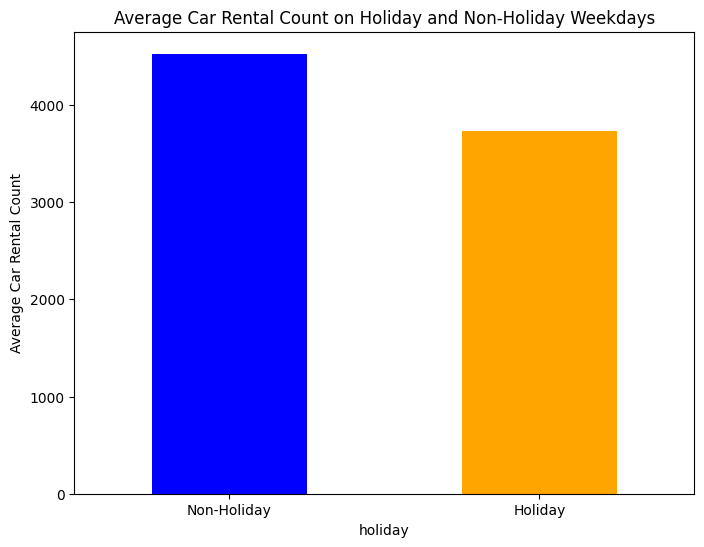

There are more rentals on non-holiday weekdays compared to holidays.


In [18]:
avg_rental_count = cardata.groupby('holiday')['count_value'].mean()

plt.figure(figsize=(8, 6))
avg_rental_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Car Rental Count on Holiday and Non-Holiday Weekdays')
plt.ylabel('Average Car Rental Count')
plt.xticks(rotation=0, ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.show()

if avg_rental_count['Yes'] > avg_rental_count['No']:
    print("There are more rentals on holidays compared to non-holiday weekdays.")
elif avg_rental_count['Yes'] < avg_rental_count['No']:
    print("There are more rentals on non-holiday weekdays compared to holidays.")
else:
    print("There is no significant difference in rental patterns between holiday and non-holiday weekdays.")

Surprisingly the count of car rentals on holidays is less than that on Non-holiday weekdays. This analogy can be becuase that people don't rent cars to go to work on holidays and there is a dip in rentals.

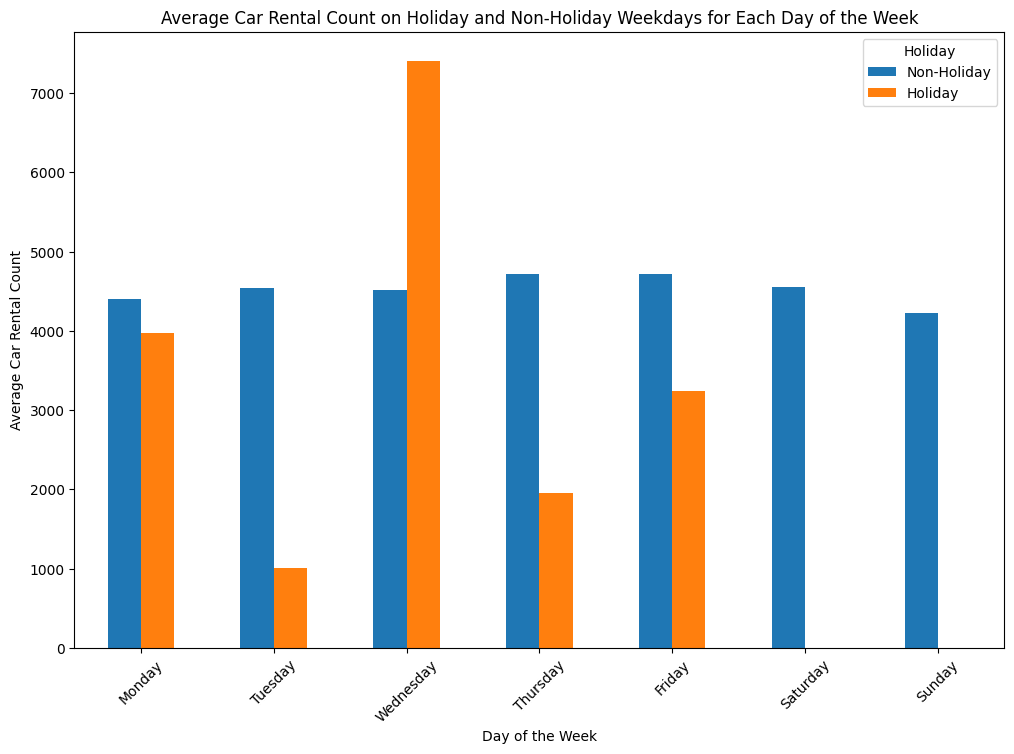

In [19]:
# Calculate average car rental count for each day of the week, separated by holiday and non-holiday weekdays
avg_rental_count2 = cardata.groupby(['weekday', 'holiday'])['count_value'].mean().unstack()

# Re-order weekdays for better visualization
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_rental_count2 = avg_rental_count2.reindex(weekday_order)

# Create a bar chart for each day of the week
fig, ax = plt.subplots(figsize=(12, 8))
avg_rental_count2.plot(kind='bar', ax=ax)
plt.title('Average Car Rental Count on Holiday and Non-Holiday Weekdays for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Car Rental Count')
plt.xticks(rotation=45)
plt.legend(title='Holiday', labels=['Non-Holiday', 'Holiday'])
plt.show()

In [20]:
### Comment here: Generally the car rental sales is high but an anomaly is seen on wednesday where the holiday sales > non-holiday sales.
# Also we have no reported holiday data for weekends, so no plot for holiday rentals on weekend.

<b> 1.6 Plot a small multiple of bar charts to understand data distribution of the following categorical variables. </b>
1. month
2. season
3. working_day
4. weather
<b></b>

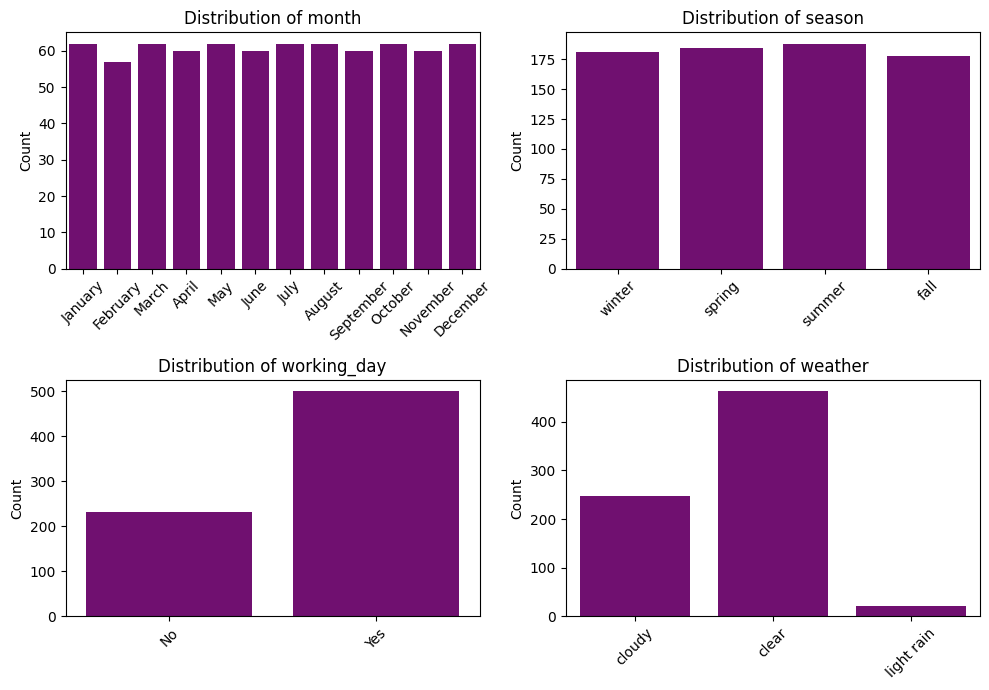

In [21]:
### Code Here
# Define categorical variables
categorical_variables = ['month', 'season', 'working_day', 'weather']

# Create small multiples of bar charts
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

for i, variable in enumerate(categorical_variables):
    row = i // 2
    col = i % 2
    sns.countplot(x=variable, data=cardata, ax=axes[row, col], color='purple')
    axes[row, col].set_title(f'Distribution of {variable}')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<b> 1.7 Compare the number of registered and casual car rentals over time by month. Create a stacked bar chart to show the contributions of each user type. </b>

In [22]:
cardata.head()

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count_value
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<Figure size 1000x600 with 0 Axes>

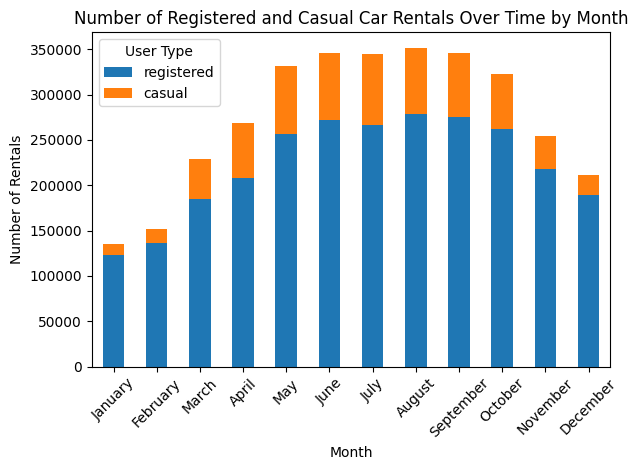

In [23]:
rentals_by_month = cardata.groupby('month')[['registered', 'casual']].sum()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
rentals_by_month = rentals_by_month.reindex(months_order)

plt.figure(figsize=(10, 6))
rentals_by_month.plot(kind='bar', stacked=True)
plt.title('Number of Registered and Casual Car Rentals Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.tight_layout()
plt.show()

 <b> 1.8 Plot relationships between the following features and the target variable count as a small multiple of scatter plots.is there any relationship between them ? </b>

1. temp
2. feels_temp
3. humidity
4. windspeed
<b></b>

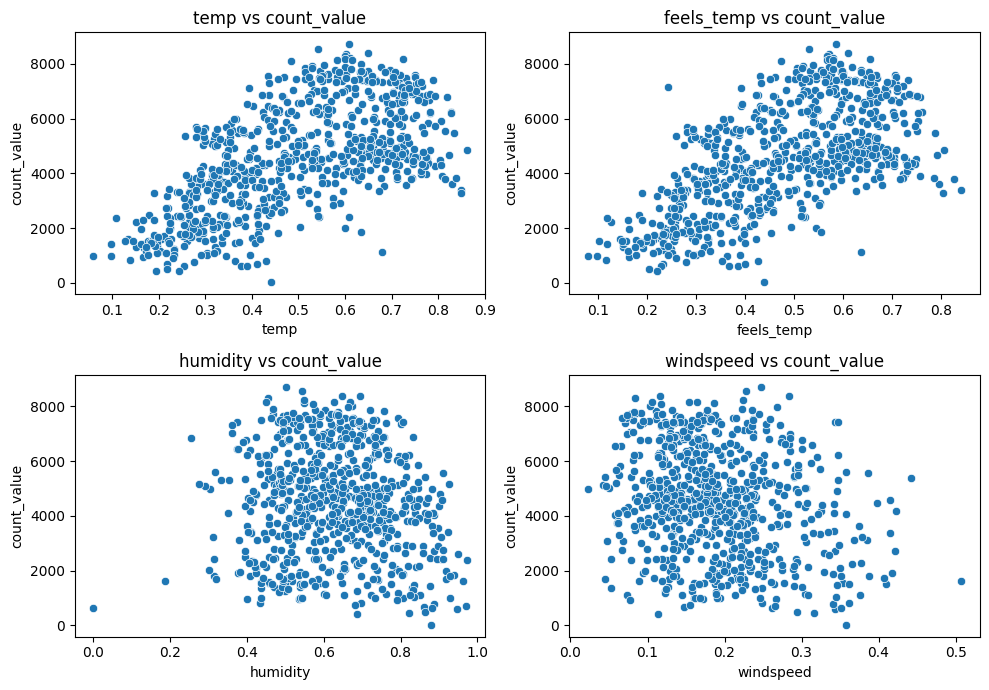

In [24]:
### Code here
# relevant features and target variable
features = ['temp', 'feels_temp', 'humidity', 'windspeed']
target_variable = 'count_value'

# small subplots of scatter plots
plt.figure(figsize=(10, 7))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=feature, y=target_variable, data=cardata)
    plt.title(f'{feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)

plt.tight_layout()
plt.show()

In [25]:
### Comment here: For temp and feels_temp the count value generally increases upon increasing the value of temp & feels_tmep.
# But nothing linear can be said about the humidity & windspeed vs count_value, but we can say that majority care sales (count_value) is observed only
# after & before a certain threshold respectively.

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression


The objective of this dataset is to predict the count of car rentals based on weather and time. We will use linear regression to predict the count using weather and time.

In [26]:
# split data into features and labels
# I am creating 2 new variables with changed suffix so as to avoid running the code again if any error faced in future

car_rental_df2 = car_rental_df
cardata2 = cardata

car_rental_X = car_rental_df2.drop(columns=['count_value'])
car_rental_y = car_rental_df2['count_value']

In [27]:
cardata2.head()

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count_value
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**2.1.1 Plot the relationships between the label (count_value) and the continuous features (temp, feels_temp, humidity, windspeed, casual, registered) using a small multiple of scatter plots. Make sure to label the axes.**

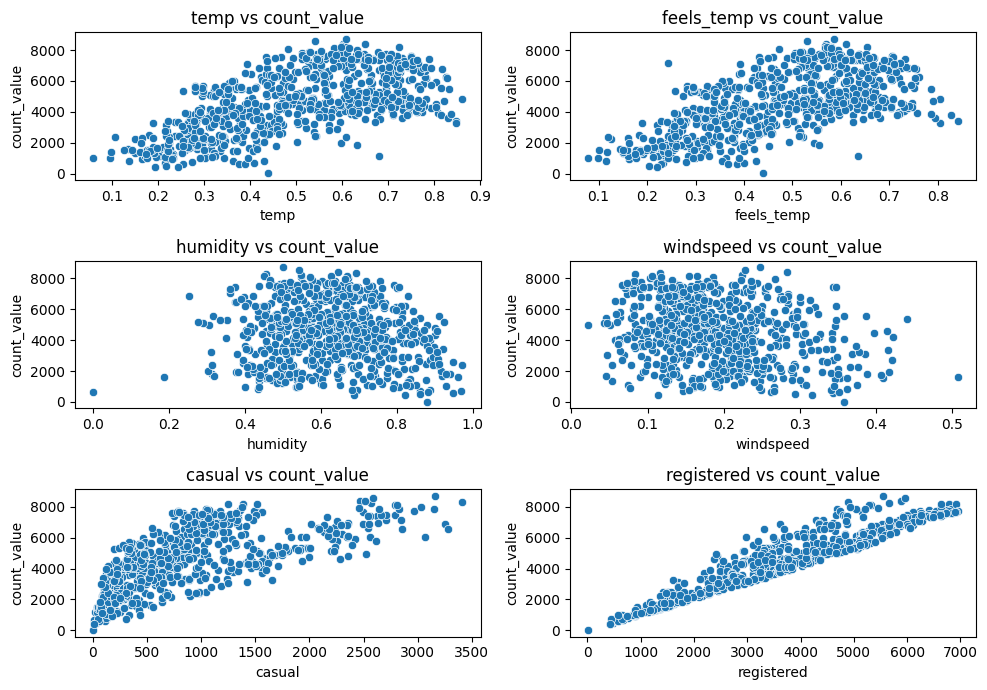

In [28]:
### Code here
ct_features = ['temp', 'feels_temp', 'humidity', 'windspeed', 'casual', 'registered']
label = 'count_value'

# small subplots of scatter plots
plt.figure(figsize=(10, 7))
for i, feature in enumerate(ct_features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=feature, y=label, data=cardata2)
    plt.title(f'{feature} vs {label}')
    plt.xlabel(feature)
    plt.ylabel(label)

plt.tight_layout()
plt.show()



**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

In [29]:
### Comment here
# I feel that linear regression can be used to predict count value but variables like humidity and windspeed shouldn't
# be relied upon as much as others and overall the count value is linear with the desired parameters with some nominal confidence interval as expected.

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


**2.1.3 Encode the categorical variables of the dataset.**

In [30]:
cardata2.head()

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count_value
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
columns = ['month', 'season', 'holiday', 'weekday', 'working_day', 'weather']

for column_name in columns:
    counts = cardata2[column_name].value_counts()
    print(f"Unique values and their frequencies for column '{column_name}':")
    print(counts)
    print()

Unique values and their frequencies for column 'month':
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     57
Name: month, dtype: int64

Unique values and their frequencies for column 'season':
summer    188
spring    184
winter    181
fall      178
Name: season, dtype: int64

Unique values and their frequencies for column 'holiday':
No     710
Yes     21
Name: holiday, dtype: int64

Unique values and their frequencies for column 'weekday':
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Wednesday    104
Thursday     104
Friday       104
Name: weekday, dtype: int64

Unique values and their frequencies for column 'working_day':
Yes    500
No     231
Name: working_day, dtype: int64

Unique values and their frequencies for column 'weather':
clear         463
cloudy        247
light rain     21
Name: weather, dtype: int64



Month --> 12 values --> Ordinal encoding

Season --> 4 values --> One-hot encoding

Holiday --> 2 values --> Binary encoding (~ label encoding if 2 values)

Weekday --> 7 values --> Ordinal encoding

Working day --> 2 values --> Binary encoding (~ label encoding if 2 values)

weather --> 3 values --> One-hot encoding

In [32]:
cardata2

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count_value
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,December,winter,No,Thursday,Yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,December,winter,No,Friday,Yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,December,winter,No,Saturday,No,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,December,winter,No,Sunday,No,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [33]:
### Code here

# Ordinal encoding for 'month' & 'weekday'
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
cardata2['month_encoded'] = cardata2['month'].map(month_mapping)

weekday_mapping = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}
cardata2['weekday_encoded'] = cardata2['weekday'].map(weekday_mapping)

# One-hot encoding for 'season' and 'weather'
cardata2 = pd.get_dummies(cardata2, columns=['season', 'weather'], drop_first=True)

# Binary encoding for 'holiday' and 'working_day'
cardata2['holiday_encoded'] = (cardata2['holiday'] == 'Yes').astype(int)
cardata2['working_day_encoded'] = (cardata2['working_day'] == 'Yes').astype(int)

# Drop the original categorical columns
cardata2.drop(['month', 'holiday', 'weekday', 'working_day'], axis=1, inplace=True)


In [34]:
### Code here
cardata2.head()

,temp,feels_temp,humidity,windspeed,casual,registered,count_value,month_encoded,weekday_encoded,season_spring,season_summer,season_winter,weather_cloudy,weather_light rain,holiday_encoded,working_day_encoded
0,0.344167,0.363625,0.805833,0.160446,331,654,985,1,6,0,0,1,1,0,0,0
1,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,0,1,1,0,0,0
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,1,0,0,1,0,0,0,1
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,2,0,0,1,0,0,0,1
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,3,0,0,1,0,0,0,1


**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

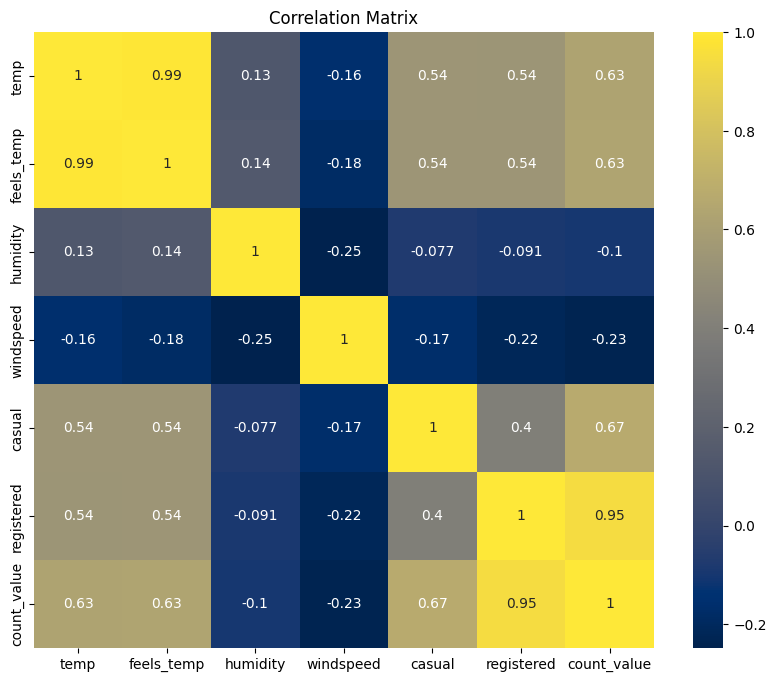

In [35]:
### Code here
variables = ['temp', 'feels_temp', 'humidity', 'windspeed', 'casual', 'registered', 'count_value']

# correlation matrix
corr = cardata2[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='cividis')
# sns.heatmap(corr, annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

In [36]:
### Code here
cardata2 = cardata2.drop(columns = ['registered', 'feels_temp'])

***Why we need to dorp these columns?***

**Multicollinearity:** Highly correlated features provide redundant information to the process, leading to multicollinearity. This can destabilize the model's coefficient estimates and make them sensitive to small changes in the data.

**Overfitting:** Including highly correlated features in the model can lead to overfitting, where the model performs well on the training data but poorly on unseen data. By removing redundant features, we reduce the risk of overfitting and improve the generalization performance of the model.

**Computational Efficiency:** Removing highly correlated features can improve computational efficiency during model training and prediction, as the model has fewer features to process.

In [37]:
### Comment here: Answered in the markdown above


In [38]:
cardata2

,temp,humidity,windspeed,casual,count_value,month_encoded,weekday_encoded,season_spring,season_summer,season_winter,weather_cloudy,weather_light rain,holiday_encoded,working_day_encoded
0,0.344167,0.805833,0.160446,331,985,1,6,0,0,1,1,0,0,0
1,0.363478,0.696087,0.248539,131,801,1,0,0,0,1,1,0,0,0
2,0.196364,0.437273,0.248309,120,1349,1,1,0,0,1,0,0,0,1
3,0.200000,0.590435,0.160296,108,1562,1,2,0,0,1,0,0,0,1
4,0.226957,0.436957,0.186900,82,1600,1,3,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.652917,0.350133,247,2114,12,4,0,0,1,1,0,0,1
727,0.253333,0.590000,0.155471,644,3095,12,5,0,0,1,1,0,0,1
728,0.253333,0.752917,0.124383,159,1341,12,6,0,0,1,1,0,0,0
729,0.255833,0.483333,0.350754,364,1796,12,0,0,0,1,0,0,0,0


**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [39]:
### Code here

car_rental_X = cardata2.drop(columns=['count_value'])
car_rental_y = cardata2['count_value']

car_rental_X_dev, car_rental_X_test, car_rental_y_dev, car_rental_y_test = train_test_split(car_rental_X, car_rental_y, test_size=0.2, random_state=42)
car_rental_X_train, car_rental_X_val, car_rental_y_train, car_rental_y_val = train_test_split(car_rental_X_dev, car_rental_y_dev, test_size=0.25, random_state=84)

print("Training set:", car_rental_X_train.shape, car_rental_y_train.shape)
print("Validation set:", car_rental_X_val.shape, car_rental_y_val.shape)
print("Testing set:", car_rental_X_test.shape, car_rental_y_test.shape)

Training set: (438, 13) (438,)
Validation set: (146, 13) (146,)
Testing set: (147, 13) (147,)


**2.1.6 Standardize the columns in the feature matrices.**

In [40]:
### Code here

scalar = StandardScaler()

car_rental_X_train = scalar.fit_transform(car_rental_X_train)
car_rental_X_val = scalar.transform(car_rental_X_val)
car_rental_X_test = scalar.transform(car_rental_X_test)

In [41]:
mean_train = np.mean(car_rental_X_train, axis=0)
std_train = np.std(car_rental_X_train, axis=0)
print("Mean of scaled training data:", mean_train)
print("Standard deviation of scaled training data:", std_train,'\n')

mean_val = np.mean(car_rental_X_val, axis=0)
std_val = np.std(car_rental_X_val, axis=0)
print("Mean of scaled validation data:", mean_val)
print("Standard deviation of scaled validation data:", std_val,'\n')

mean_test = np.mean(car_rental_X_test, axis=0)
std_test = np.std(car_rental_X_test, axis=0)
print("Mean of scaled training data:", mean_test)
print("Standard deviation of scaled training data:", std_test,'\n')

Mean of scaled training data: [ 3.24448738e-17  9.14539880e-16 -1.01390231e-17 -3.34587761e-17
 -1.22682179e-16  1.15584863e-16 -1.82502415e-17  9.73346213e-17
  1.17612667e-16  5.27229199e-17  2.83892646e-17  8.31399891e-17
 -1.50057541e-16]
Standard deviation of scaled training data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

Mean of scaled validation data: [ 0.12333931 -0.09349533 -0.0750898   0.30660114 -0.00847874 -0.22253312
  0.2430764  -0.01560976 -0.1717074   0.06296156 -0.07532436  0.07642723
 -0.15265751]
Standard deviation of scaled validation data: [0.95585769 1.10286613 0.93736754 1.11914276 0.91200294 1.04959886
 1.1172116  0.99131216 0.88481339 1.02007666 0.78007092 1.21756997
 1.04880076] 

Mean of scaled training data: [-0.09913622 -0.14158677 -0.03114188 -0.06929798  0.07227562 -0.0196876
 -0.01984297 -0.01953875  0.02697197 -0.01443075 -0.07609297  0.12041188
  0.11708097]
Standard deviation of scaled training data: [1.02486781 1.03231937 0.99159948 0.92764765 1.009

In [42]:
#Adding a column of ones to the feature matrices for the bias term.

car_rental_X_train = np.hstack([np.ones((car_rental_X_train.shape[0], 1)), car_rental_X_train])
car_rental_X_val = np.hstack([np.ones((car_rental_X_val.shape[0], 1)), car_rental_X_val])
car_rental_X_test = np.hstack([np.ones((car_rental_X_test.shape[0], 1)), car_rental_X_test])


At the end of this pre-processing, you should have the following vectors and matrices:
- Car_Rental Prediction dataset: car_rental_X_train, car_rental_X_val, car_rental_X_test, car_rental_y_train, car_rental_y_val, car_rental_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.7 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [43]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        None
        '''
        ### Your code here

        n = X.shape[1]
        self.w = np.linalg.inv(X.T @ X + self.alpha * np.identity(n)) @ X.T @ y



        return None

    def predict(self, X):
        '''Predicts on X using trained model.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = X @ self.w
        return y_pred



### Train, Evaluate, and Interpret LR Model

**2.1.8 Train a linear regression model ($\alpha = 0$) on the training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [44]:
def get_report(y_pred, y_test):
    """
    function to Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns a dataframe with 6 rows.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual':actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [45]:
### Code here

lr_model = LinearRegression(alpha=0)
lr_model.train(car_rental_X_train, car_rental_y_train)

y_train_pred = lr_model.predict(car_rental_X_train)
y_val_pred = lr_model.predict(car_rental_X_val)
y_test_pred = lr_model.predict(car_rental_X_test)

r2_train = r2_score(car_rental_y_train, y_train_pred)
r2_val = r2_score(car_rental_y_val, y_val_pred)
r2_test = r2_score(car_rental_y_test, y_test_pred)

print("R2 score on training set:", r2_train)
print("R2 score on validation set:", r2_val)
print("R2 score on test set:", r2_test)

report_df = get_report(y_test_pred, car_rental_y_test)
print("\nPredictions for test set vs Actual labelds:")
print(report_df)


R2 score on training set: 0.758701065251997
R2 score on validation set: 0.7342074285364513
R2 score on test set: 0.7180929946660735

Predictions for test set vs Actual labelds:
           Prediction  Actual
Position                     
1         5121.532889    6606
2         2740.480997    1550
3         4655.839353    3747
145       6145.228240    2792
146       5490.724268    5180
147       4896.430445    3958


**2.1.9 As a baseline model, use the mean of the training labels (car_rental_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [46]:
### Code here
y_train_mean = car_rental_y_train.mean()
y_val_mean = car_rental_y_val.mean()
y_test_mean = car_rental_y_test.mean()


r2_train_base = r2_score(car_rental_y_train, np.full_like(car_rental_y_train, y_train_mean))
r2_val_base = r2_score(car_rental_y_val, np.full_like(car_rental_y_val, y_val_mean))
r2_test_base = r2_score(car_rental_y_test, np.full_like(car_rental_y_test, y_test_mean))

print("Baseline R2 score on training set:", r2_train_base)
print("Baseline R2 score on validation set:", r2_val_base)
print("Baseline R2 score on test set:", r2_test_base)


Baseline R2 score on training set: -6.435502197810195e-08
Baseline R2 score on validation set: -5.715014217422265e-08
Baseline R2 score on test set: -3.491074251904536e-08


**2.1.10 Interpret your model trained on the car rental dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

In [47]:
### Code here

feature_names = ['bias'] + ['feature_' + str(i) for i in range(1, len(lr_model.w))]

weights_df = pd.DataFrame({'Features': feature_names, 'Weights': lr_model.w})

weights_df

,Features,Weights
0,bias,4486.488584
1,feature_1,443.978079
2,feature_2,-219.833155
3,feature_3,-39.220857
4,feature_4,1388.141817
5,feature_5,50.777229
6,feature_6,-13.480006
7,feature_7,-326.423734
8,feature_8,-403.800204
9,feature_9,-408.057979


<ipython-input-48-139b795ab4b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Features', y='Weights', data=weights_df, palette='viridis')


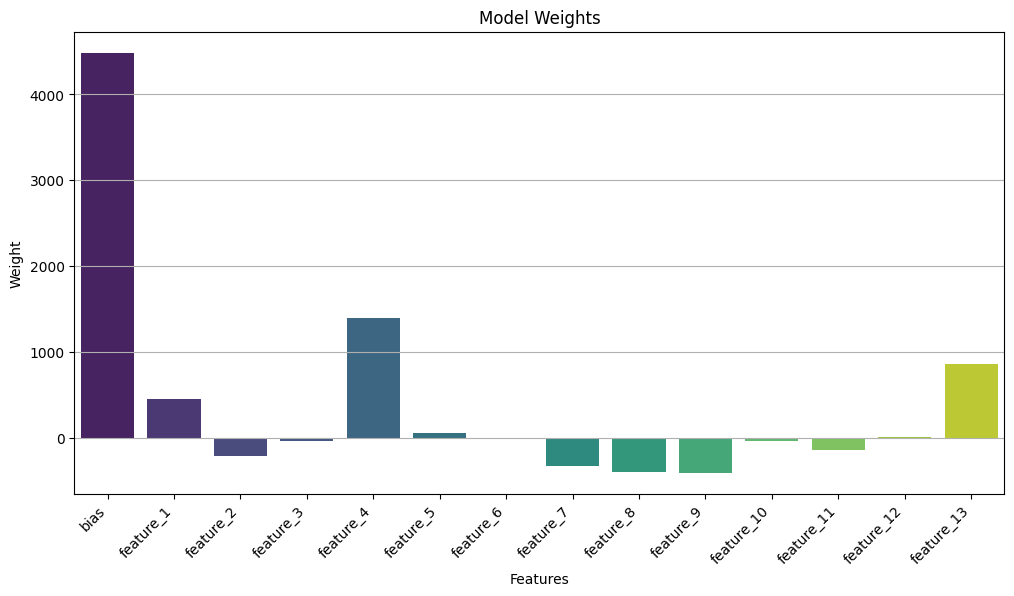

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Features', y='Weights', data=weights_df, palette='viridis')
# RdBu cividis viridis
plt.xlabel('Features')
plt.ylabel('Weight')
plt.title('Model Weights')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-')
plt.show()

In [49]:
weights_df_sorted = weights_df.sort_values(by = ['Weights'], ascending=False)
weights_df_sorted

,Features,Weights
0,bias,4486.488584
4,feature_4,1388.141817
13,feature_13,855.383611
1,feature_1,443.978079
5,feature_5,50.777229
12,feature_12,11.452388
6,feature_6,-13.480006
10,feature_10,-36.005110
3,feature_3,-39.220857
11,feature_11,-143.262614


<ipython-input-50-9877f1a6bb7e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Features', y='Weights', data=weights_df_sorted, palette='viridis')


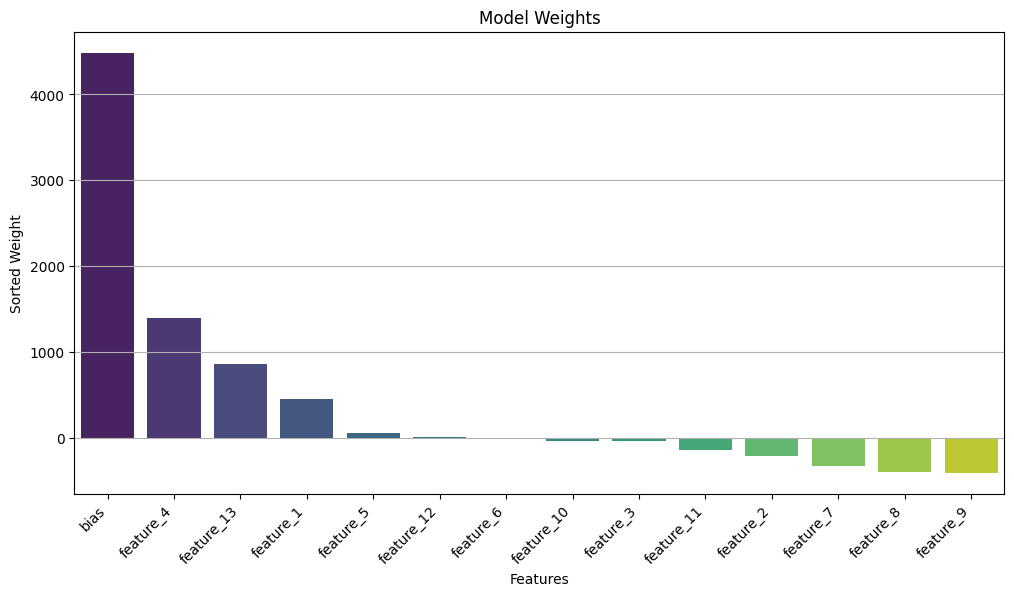

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Features', y='Weights', data=weights_df_sorted, palette='viridis')
# RdBu cividis viridis
plt.xlabel('Features')
plt.ylabel('Sorted Weight')
plt.title('Model Weights')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-')
plt.show()

**2.1.11 According to your model, which features are the greatest contributors to the income?**

In [51]:
### Comment here
# According to the model I trained bias is the greatest contributor tothe income variable.
# If we exclude bias variable feature 4 > 13 > 1 > 5 > 12 > 6 > 10 > 3 > 11 > 2 > 7 > 8 > 9 is the order of contribution
# where 4 being the higghest and 9 being the lowest in all the weights category


### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the car rental dataset.

**2.1.12 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

In [52]:
alphas = np.logspace(-5, 1, 20)
alphas

array([1.00000000e-05, 2.06913808e-05, 4.28133240e-05, 8.85866790e-05,
       1.83298071e-04, 3.79269019e-04, 7.84759970e-04, 1.62377674e-03,
       3.35981829e-03, 6.95192796e-03, 1.43844989e-02, 2.97635144e-02,
       6.15848211e-02, 1.27427499e-01, 2.63665090e-01, 5.45559478e-01,
       1.12883789e+00, 2.33572147e+00, 4.83293024e+00, 1.00000000e+01])

alpha =  1e-05
Training R2 value =  0.7587010652519924
Validation R2 value =  0.73420743043499
Testing R2 value =  0.7180930052484915 

alpha =  2.06913808111479e-05
Training R2 value =  0.7587010652519777
Validation R2 value =  0.7342074324647796
Testing R2 value =  0.718093016562549 

alpha =  4.281332398719396e-05
Training R2 value =  0.7587010652519146
Validation R2 value =  0.7342074366646605
Testing R2 value =  0.7180930399728661 

alpha =  8.858667904100833e-05
Training R2 value =  0.7587010652516444
Validation R2 value =  0.7342074453546448
Testing R2 value =  0.7180930884119181 

alpha =  0.00018329807108324357
Training R2 value =  0.7587010652504875
Validation R2 value =  0.734207463334789
Testing R2 value =  0.718093188638461 

alpha =  0.000379269019073225
Training R2 value =  0.7587010652455346
Validation R2 value =  0.7342075005354758
Testing R2 value =  0.7180933960186919 

alpha =  0.0007847599703514606
Training R2 value =  0.7587010652243295
Validation R2 value =  0.73

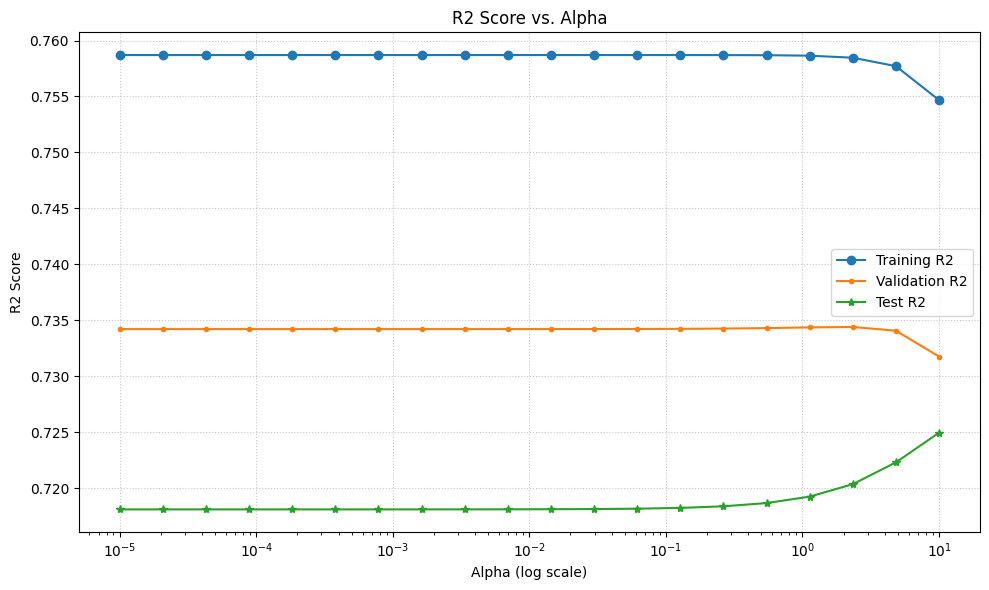

In [53]:
### Code here
alphas = np.logspace(-5, 1, 20)

train_r2_scores = []
val_r2_scores = []
test_r2_scores = []

for alpha in alphas:
    model = LinearRegression(alpha=alpha)
    model.train(car_rental_X_train, car_rental_y_train)

    y_train_pred = model.predict(car_rental_X_train)
    y_val_pred = model.predict(car_rental_X_val)
    y_test_pred = model.predict(car_rental_X_test)

    train_r2 = r2_score(car_rental_y_train, y_train_pred)
    val_r2 = r2_score(car_rental_y_val, y_val_pred)
    test_r2 = r2_score(car_rental_y_test, y_test_pred)

    print("alpha = ", alpha)
    print("Training R2 value = ",train_r2)
    print("Validation R2 value = ",val_r2)
    print("Testing R2 value = ",test_r2,'\n')


    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)
    test_r2_scores.append(test_r2)

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Training R2', marker='o')
plt.plot(alphas, val_r2_scores, label='Validation R2', marker='.')
plt.plot(alphas, test_r2_scores, label='Test R2', marker='*')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Alpha')
plt.xscale('log')  # Set x-axis to log scale
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

From the provided data, we can observe the behavior of the training and validation $R^2$ scores with decreasing model complexity (increasing $\alpha$) as follows:

1. For very small values of $\alpha$ (close to 0), both the training and validation $R^2$ scores are high. This indicates that the model is fitting the training data well and generalizing well to unseen validation data. This is typical behavior when the model has low complexity and is not regularized much.

2. As $\alpha$ increases, the model complexity decreases, leading to a decrease in the training $R^2$ score. This is because higher values of $\alpha$ result in stronger regularization, which penalizes complex models and leads to a simpler model with potentially lower training performance.

3. The validation $R^2$ score initially increases with increasing $\alpha$, reaching a peak value at an optimal $\alpha$ value. This indicates that some level of regularization improves the model's ability to generalize to unseen data. However, beyond this optimal $\alpha$ value, further increasing $\alpha$ leads to a decrease in the validation $R^2$ score. This is because excessive regularization causes the model to underfit the data, leading to poor performance on both the training and validation sets.

Overall, the plot illustrates the trade-off between model complexity and generalization performance. The goal is to select an optimal $\alpha$ value that achieves a balance between fitting the training data well and generalizing well to unseen data.

In [54]:
### Comment here: commented above in text markdown cell


### 2.2 Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [5]:
### Code here
loan_data_df = pd.read_csv('/content/drive/MyDrive/1/loan_data.csv')
loan_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])
loan_data_df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [7]:
### Code here
missing_values = loan_data_df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
loan_data_df.dropna(inplace=True)
loan_data = loan_data_df

In [9]:
loan_data_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


From the notes I see 2 ways in which we can handle missing values if performing logistic regression.

1. **Imputation:** *Impute missing values with a suitable statistic  value such as the mean, median, or mode of the column or row. However, for categorical variables, imputing with the mode or a separate category for missing values may be more appropriate.*

2. **Dropping rows or columns:** *We can consider dropping rows with missing values or dropping entire columns with a high proportion of missing values.*

I dropped the corrsponding rows & columns because I didn't want to add any values that would shift the true threshold while performing activation.

In [10]:
### Comment here: Wrote in markdown above.


**2.2.3 Encode the categorical variables.**

In [11]:
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col_name in cols:
    freqs = loan_data_df[col_name].value_counts()
    print(f"Unique values and their frequencies for column '{col_name}':")
    print(freqs)
    print()

Unique values and their frequencies for column 'Gender':
Male      394
Female     86
Name: Gender, dtype: int64

Unique values and their frequencies for column 'Married':
Yes    311
No     169
Name: Married, dtype: int64

Unique values and their frequencies for column 'Dependents':
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

Unique values and their frequencies for column 'Education':
Graduate        383
Not Graduate     97
Name: Education, dtype: int64

Unique values and their frequencies for column 'Self_Employed':
No     414
Yes     66
Name: Self_Employed, dtype: int64

Unique values and their frequencies for column 'Property_Area':
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

Unique values and their frequencies for column 'Loan_Status':
Y    332
N    148
Name: Loan_Status, dtype: int64



In [12]:
# ### Code here

# Binary/Label encoding for Gender, Married and Self employed
loan_data_df['Gender'] = loan_data_df['Gender'].map({'Male': 1, 'Female': 0})
loan_data_df['Married'] = loan_data_df['Married'].map({'Yes': 1, 'No': 0})
loan_data_df['Self_Employed'] = loan_data_df['Self_Employed'].map({'No': 0, 'Yes': 1})

# OH encoding for dpendnets, Education, Property area and Loan status
loan_data_df = pd.get_dummies(loan_data_df, columns=['Dependents'], prefix='Dependents')
loan_data_df = pd.get_dummies(loan_data_df, columns=['Education', 'Property_Area'])


In [13]:
loan_data_df

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,0,4583,1508.0,128.0,360.0,1.0,N,0,1,0,0,1,0,1,0,0
2,1,1,1,3000,0.0,66.0,360.0,1.0,Y,1,0,0,0,1,0,0,0,1
3,1,1,0,2583,2358.0,120.0,360.0,1.0,Y,1,0,0,0,0,1,0,0,1
4,1,0,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,1,0,0,0,1
5,1,1,1,5417,4196.0,267.0,360.0,1.0,Y,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.0,360.0,1.0,Y,1,0,0,0,1,0,1,0,0
610,1,1,0,4106,0.0,40.0,180.0,1.0,Y,0,0,0,1,1,0,1,0,0
611,1,1,0,8072,240.0,253.0,360.0,1.0,Y,0,1,0,0,1,0,0,0,1
612,1,1,0,7583,0.0,187.0,360.0,1.0,Y,0,0,1,0,1,0,0,0,1


In [14]:
loan_data_df.columns

Index(['Gender', 'Married', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [15]:
mv = loan_data_df.isnull().sum()

print("Missing values in each column:")
print(mv)

Missing values in each column:
Gender                     0
Married                    0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [16]:
loan_data_df.head()

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,0,4583,1508.0,128.0,360.0,1.0,N,0,1,0,0,1,0,1,0,0
2,1,1,1,3000,0.0,66.0,360.0,1.0,Y,1,0,0,0,1,0,0,0,1
3,1,1,0,2583,2358.0,120.0,360.0,1.0,Y,1,0,0,0,0,1,0,0,1
4,1,0,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,1,0,0,0,1
5,1,1,1,5417,4196.0,267.0,360.0,1.0,Y,0,0,1,0,1,0,0,0,1


In [17]:
### Code here
prob_Y = (loan_data_df['Loan_Status'] == 'Y').mean()
prob_N = (loan_data_df['Loan_Status'] == 'N').mean()

print("Probability of approval (Y):", prob_Y)
print("Probability of rejection (N):", prob_N)


Probability of approval (Y): 0.6916666666666667
Probability of rejection (N): 0.30833333333333335


**Labels balanced or not?**

- Probability of approval (Y): ~ 0.692
- Probability of rejection (N): ~ 0.308

We can observe that the probability of approval (Y) is significantly higher than the probability of rejection (N).

This indicates that the distribution of labels is imbalanced, with a larger proportion of loans being approved ('Y') compared to loans being rejected ('N').

In [18]:
### Comment here: Typed in markdown cell abobe


**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

In [19]:
loan_data_df.columns

Index(['Gender', 'Married', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

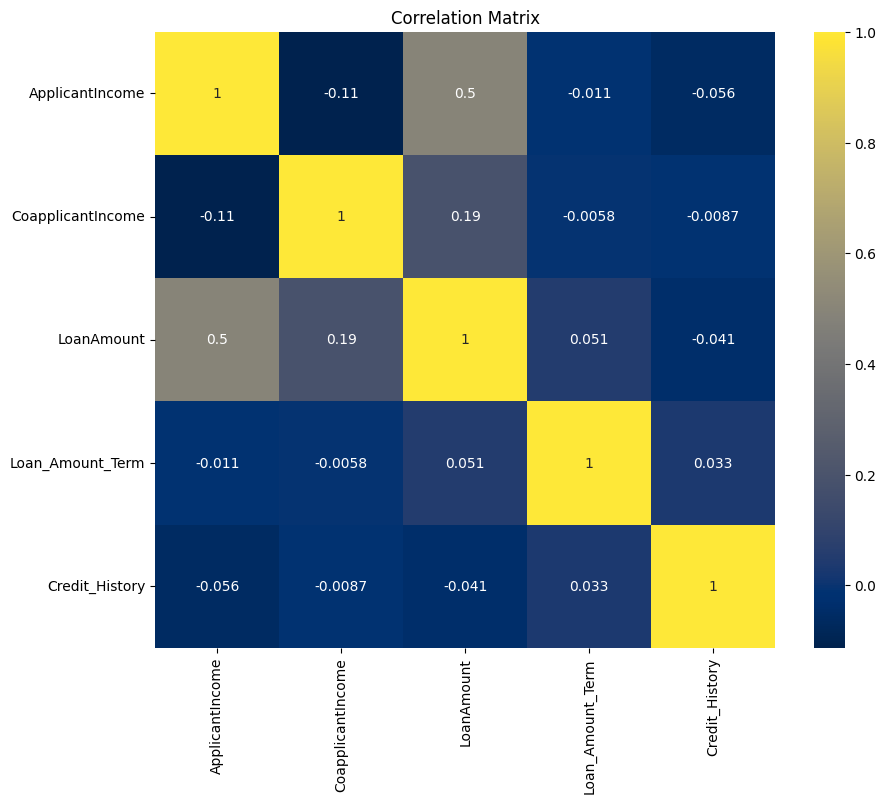

In [20]:
### Code here
vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

corr2 = loan_data_df[vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr2, annot=True, cmap='cividis')
# sns.heatmap(corr2, annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()


In [21]:
### Comments
#  No columns had corr >= 0.9

**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [24]:
### Code here

y = np.array(loan_data_df['Loan_Status'])
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

X = loan_data_df.drop(columns=['Loan_Status'])

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_final = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_val_final = np.hstack([np.ones((X_val_scaled.shape[0], 1)), X_val_scaled])
X_test_final = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

print("Training set shape:", X_train_final.shape, y_train.shape)
print("Validation set shape:", X_val_final.shape, y_val.shape)
print("Testing set shape:", X_test_final.shape, y_test.shape)


Training set shape: (288, 18) (288,)
Validation set shape: (96, 18) (96,)
Testing set shape: (96, 18) (96,)


### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [29]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

In [31]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

In [32]:
print(y_train_encoded.dtype)
print(y_train.dtype)


int64
object


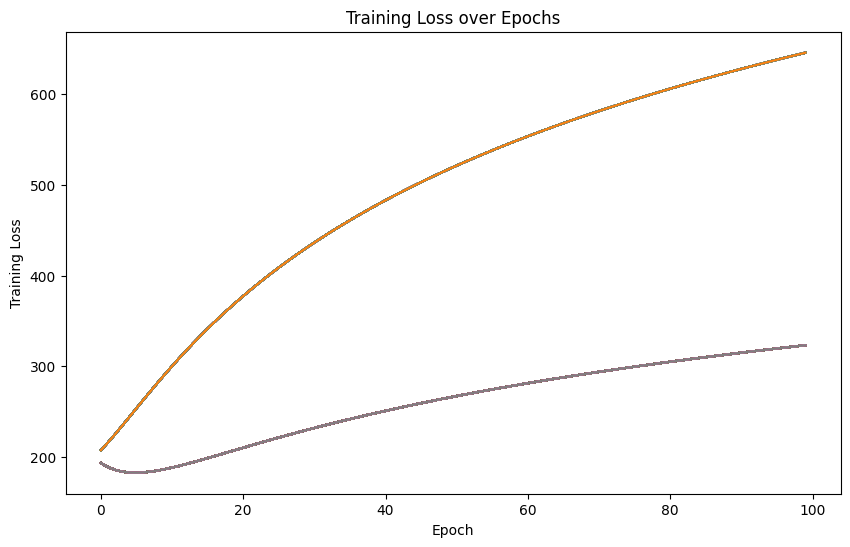

In [33]:
### Code here: For Task 1
log_reg = LogisticRegression(alpha=0, t=100, eta=1e-3)
losses = log_reg.train(X_train_final, y_train_encoded)

plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [ ]:
### Code here: Task 2
best_accuracy = 0
best_hyperparams = None

for _ in range(20):
    alpha = np.random.uniform(0, 1)
    eta = np.random.uniform(0, 0.001)
    t = np.random.randint(1, 100)

    log_reg = LogisticRegression(alpha=alpha, t=t, eta=eta)
    log_reg.train(X_train_final, y_train)
    y_pred = log_reg.predict(X_val_final)
    accuracy = accuracy_score(y_val, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparams = {'alpha': alpha, 'eta': eta, 't': t}

print("Best hyperparameters found:", best_hyperparams)
print("Validation accuracy with best hyperparameters:", best_accuracy)


In [ ]:
### Code here: Task 3
log_reg_best = LogisticRegression(alpha=best_hyperparams['alpha'], t=best_hyperparams['t'], eta=best_hyperparams['eta'])
log_reg_best.train(X_train_final, y_train)
y_pred_best = log_reg_best.predict(X_test_final)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("Accuracy on test dataset with best hyperparameters:", accuracy_best)

In [ ]:
### Code here


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

In [ ]:
### Code here


In [ ]:
### Comment here


### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [27]:
### Code here
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train.ravel())

y_train_pred = svm.predict(X_train_scaled)
y_val_pred = svm.predict(X_val_scaled)
y_test_pred = svm.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on validation set:", val_accuracy)
print("Accuracy on test set:", test_accuracy)

Accuracy on training set: 0.7951388888888888
Accuracy on validation set: 0.8333333333333334
Accuracy on test set: 0.8229166666666666


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [28]:
### Code here
svm2 = SVC(kernel='rbf')
svm2.fit(X_train_scaled, y_train.ravel())

y_train_pred = svm2.predict(X_train_scaled)
y_val_pred = svm2.predict(X_val_scaled)
y_test_pred = svm2.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on validation set:", val_accuracy)
print("Accuracy on test set:", test_accuracy)

Accuracy on training set: 0.8229166666666666
Accuracy on validation set: 0.8333333333333334
Accuracy on test set: 0.8020833333333334
